In [1]:
from fastai.vision.all import *

In [2]:
DATASETS_DIR = Path(os.environ['DATASETS_DIR'])/'sorghum-id-fgvc-9'
DATASETS_DIR.ls()

(#4) [Path('/datasets/sorghum-id-fgvc-9/train_cultivar_mapping.csv'),Path('/datasets/sorghum-id-fgvc-9/test'),Path('/datasets/sorghum-id-fgvc-9/train_images'),Path('/datasets/sorghum-id-fgvc-9/sample_submission.csv')]

In [3]:
(DATASETS_DIR/'train_images').ls()

(#22194) [Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-19__13-06-29-651.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-03__12-58-24-135.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-15__12-32-43-241.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-01__11-31-50-488.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-02__16-25-06-191.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-28__12-52-56-384.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-05__12-08-56-198.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-13__11-37-46-365.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-26__18-27-33-812.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-27__11-00-20-408.png')...]

In [4]:
(DATASETS_DIR/'test').ls()

(#23639) [Path('/datasets/sorghum-id-fgvc-9/test/1320211956.png'),Path('/datasets/sorghum-id-fgvc-9/test/1460752465.png'),Path('/datasets/sorghum-id-fgvc-9/test/1437601570.png'),Path('/datasets/sorghum-id-fgvc-9/test/1053653999.png'),Path('/datasets/sorghum-id-fgvc-9/test/937061344.png'),Path('/datasets/sorghum-id-fgvc-9/test/1526324826.png'),Path('/datasets/sorghum-id-fgvc-9/test/1295561477.png'),Path('/datasets/sorghum-id-fgvc-9/test/993820791.png'),Path('/datasets/sorghum-id-fgvc-9/test/1054144892.png'),Path('/datasets/sorghum-id-fgvc-9/test/1911037980.png')...]

In [5]:
!head {DATASETS_DIR/'train_cultivar_mapping.csv'}

image,cultivar
2017-06-16__12-24-20-930.png,PI_257599
2017-06-02__16-48-57-866.png,PI_154987
2017-06-12__13-18-07-707.png,PI_92270
2017-06-22__13-18-06-841.png,PI_152651
2017-06-26__12-56-48-642.png,PI_176766
2017-06-05__12-30-08-470.png,PI_156330
2017-06-18__13-23-50-617.png,PI_329299
2017-06-15__14-08-45-158.png,PI_52606
2017-06-13__10-47-59-932.png,PI_145633


In [6]:
!head {DATASETS_DIR/'sample_submission.csv'}

filename,cultivar
1000005362.png,PI_152923
1000099707.png,PI_152923
1000135300.png,PI_152923
1000136796.png,PI_152923
1000292439.png,PI_152923
1000350798.png,PI_152923
100043618.png,PI_152923
1000556805.png,PI_152923
1000673645.png,PI_152923


In [7]:
files = get_image_files(DATASETS_DIR/"train_images")
len(files)

22193

In [8]:
files[0]

Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-19__13-06-29-651.png')

In [9]:
df = pd.read_csv(DATASETS_DIR/'train_cultivar_mapping.csv')
df.head()

,image,cultivar
0,2017-06-16__12-24-20-930.png,PI_257599
1,2017-06-02__16-48-57-866.png,PI_154987
2,2017-06-12__13-18-07-707.png,PI_92270
3,2017-06-22__13-18-06-841.png,PI_152651
4,2017-06-26__12-56-48-642.png,PI_176766


In [10]:
MODEL = resnet101
BS = 4*9
RESIZE_TO = 32*20
ITEM_TFMS = RandomResizedCrop(RESIZE_TO, min_scale=0.3)
BATCH_TFMS = aug_transforms()
METRICS = error_rate

In [11]:
dls = ImageDataLoaders.from_df(df, 
                               DATASETS_DIR/'train_images',
                               bs = BS,
                               item_tfms=ITEM_TFMS,
                               batch_tfms=BATCH_TFMS)

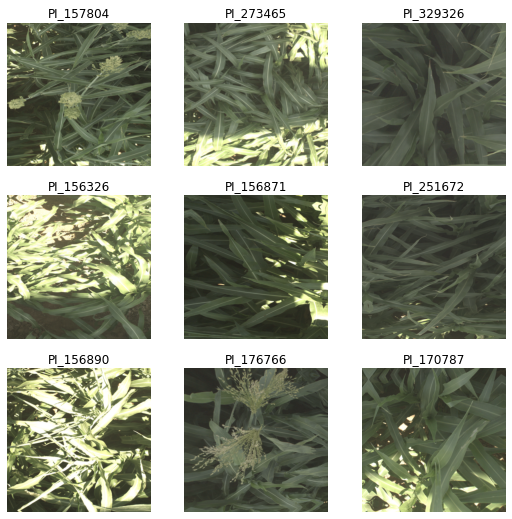

In [12]:
dls.show_batch()

In [13]:
learn = vision_learner(dls, MODEL, metrics=METRICS).to_fp16()

SuggestedLRs(valley=0.0020892962347716093)

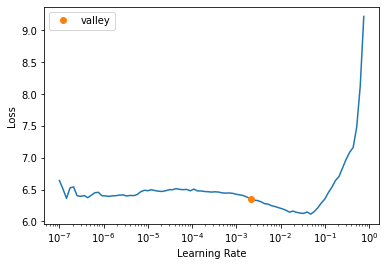

In [14]:
learn.lr_find()

In [15]:
learn.fit_one_cycle(10, 
                    lr_max=slice(3e-4, 3e-3),
                    cbs=SaveModelCallback(monitor='valid_loss',
                                          fname='resnet-101-frozen-10ep')
                   )

epoch,train_loss,valid_loss,error_rate,time
0,3.206122,2.116255,0.568499,06:08
1,1.756315,1.342464,0.381253,06:02
2,1.288787,1.001306,0.288869,06:03
3,0.971090,0.775491,0.239522,06:03
4,0.792581,0.603509,0.176206,06:03
5,0.617931,0.384384,0.103425,06:03
6,0.514962,0.292399,0.086300,06:08
7,0.432201,0.237155,0.070302,06:03
8,0.363460,0.216614,0.064894,06:03
9,0.361580,0.219886,0.061965,06:03


Better model found at epoch 0 with valid_loss value: 2.1162545680999756.
Better model found at epoch 1 with valid_loss value: 1.3424643278121948.
Better model found at epoch 2 with valid_loss value: 1.001306176185608.
Better model found at epoch 3 with valid_loss value: 0.7754905819892883.
Better model found at epoch 4 with valid_loss value: 0.6035090088844299.
Better model found at epoch 5 with valid_loss value: 0.38438427448272705.
Better model found at epoch 6 with valid_loss value: 0.2923990488052368.
Better model found at epoch 7 with valid_loss value: 0.23715487122535706.
Better model found at epoch 8 with valid_loss value: 0.2166144996881485.


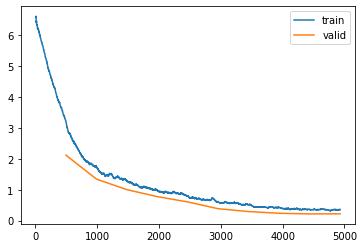

In [16]:
learn.recorder.plot_loss()

In [17]:
# learn.freeze_to(-3)

In [18]:
# learn.lr_find()

In [19]:
learn.unfreeze()

SuggestedLRs(valley=3.311311274956097e-06)

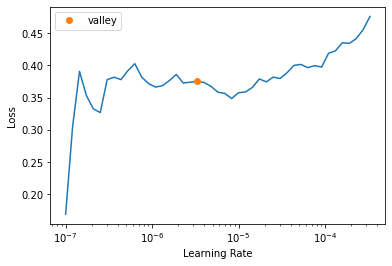

In [20]:
learn.lr_find()

In [21]:
learn.fit_one_cycle(60, 
                    lr_max=slice(1e-4, 1e-3),
                    cbs=SaveModelCallback(monitor='valid_loss',
                                          fname='resnet-101-unfrozen-60ep')
                   )

epoch,train_loss,valid_loss,error_rate,time
0,0.444469,0.219210,0.068049,07:13
1,0.437945,0.281130,0.087877,07:13
2,0.458080,0.301485,0.098468,07:13
3,0.503573,0.293303,0.093285,07:13
4,0.513137,0.391307,0.127760,07:13
5,0.591175,0.507611,0.160883,07:14
6,0.596032,0.468154,0.153673,07:13
7,0.573506,0.473707,0.150293,07:13
8,0.545700,0.707439,0.220595,07:13
9,0.571039,0.683070,0.210230,07:13


Better model found at epoch 0 with valid_loss value: 0.21921031177043915.
Better model found at epoch 18 with valid_loss value: 0.16962428390979767.
Better model found at epoch 23 with valid_loss value: 0.12791799008846283.
Better model found at epoch 24 with valid_loss value: 0.11225765198469162.
Better model found at epoch 27 with valid_loss value: 0.0842362716794014.
Better model found at epoch 32 with valid_loss value: 0.05975063890218735.
Better model found at epoch 38 with valid_loss value: 0.050993844866752625.
Better model found at epoch 41 with valid_loss value: 0.038968052715063095.
Better model found at epoch 42 with valid_loss value: 0.03712692856788635.
Better model found at epoch 44 with valid_loss value: 0.031569093465805054.
Better model found at epoch 45 with valid_loss value: 0.031262725591659546.
Better model found at epoch 47 with valid_loss value: 0.02737690508365631.
Better model found at epoch 48 with valid_loss value: 0.024040769785642624.
Better model found at 

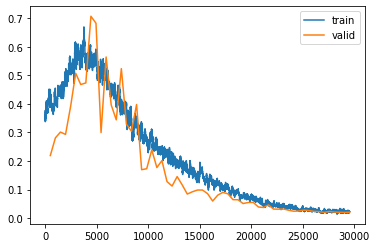

In [22]:
learn.recorder.plot_loss()

In [25]:
learn.save("resnet-101-error-0.006985")

Path('/datasets/sorghum-id-fgvc-9/train_images/models/resnet-101-error-0.006985.pth')

In [29]:
test_files = get_image_files(DATASETS_DIR/"test")
len(test_files)

23639

In [30]:
test_files

(#23639) [Path('/datasets/sorghum-id-fgvc-9/test/1320211956.png'),Path('/datasets/sorghum-id-fgvc-9/test/1460752465.png'),Path('/datasets/sorghum-id-fgvc-9/test/1437601570.png'),Path('/datasets/sorghum-id-fgvc-9/test/1053653999.png'),Path('/datasets/sorghum-id-fgvc-9/test/937061344.png'),Path('/datasets/sorghum-id-fgvc-9/test/1526324826.png'),Path('/datasets/sorghum-id-fgvc-9/test/1295561477.png'),Path('/datasets/sorghum-id-fgvc-9/test/993820791.png'),Path('/datasets/sorghum-id-fgvc-9/test/1054144892.png'),Path('/datasets/sorghum-id-fgvc-9/test/1911037980.png')...]

In [31]:
test_dl = learn.dls.test_dl(test_files)

In [32]:
tta_preds, _ = learn.tta(dl=test_dl, n=10)

In [33]:
decoded = tta_preds.argmax(dim=1)

In [34]:
learn.dls.vocab[decoded]

(#23639) ['PI_180348','PI_22913','PI_302252','PI_152733','PI_196583','PI_144134','PI_145619','PI_152961','PI_218112','PI_154987'...]

In [35]:
fieldnames = ['filename', 'cultivar']
predictions = [{'filename': f.name, 'cultivar': c} 
               for f,c in zip(test_files, learn.dls.vocab[decoded])]

In [36]:
import csv
  
with open('predictions.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = fieldnames)
    writer.writeheader()
    writer.writerows(predictions)